# PNEUMONIA PREDICTION USING CNN ALGORITHM

## Train Data


In [1]:
#importing libraries
import os
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import misc
from PIL import Image
import imageio
from skimage.transform import rescale,resize
import tensorflow as tf
from skimage import io

In [2]:
#Loading the train images from train dataset
x=[]
y=[]
base_path="C:/Users/neera/Downloads/Data/train"
for child in os.listdir(base_path):
    print(child)
    sub_path=os.path.join(base_path,child)
    if os.path.isdir(sub_path):
        for xray in os.listdir(sub_path):
            im=Image.open(os.path.join(sub_path,xray))
            im=im.convert("RGB")
            im=np.array(im.resize((224,224)))
            im=im.reshape([224,224,3])#converting all images into same dimension
            im=np.array(im)
            x.append(im)
            y.append(child)

NORMAL
PNEUMONIA


In [3]:
print('NO: of NORMAL X-rays in train dataset :',y.count("NORMAL"))
print('NO: of PNEUMONIA X-rays in train dataset :',y.count("PNEUMONIA"))

NO: of NORMAL X-rays in train dataset : 1266
NO: of PNEUMONIA X-rays in train dataset : 3418


In [4]:
#Converting the values into Float 
im_arr=np.asarray(x).astype('float32')
im_arr=im_arr/np.max(im_arr)#Normalizing values to be between 0 and 1
print(im_arr.shape)

(4684, 224, 224, 3)


In [5]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y=lb.fit_transform(y)
y.shape

(4684, 1)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(im_arr,y,test_size=0.2,random_state=42,stratify=y)

## Evaluation Data

In [8]:
#Loading the train images from train dataset
x1=[]
y1=[]
base_path="C:/Users/neera/Downloads/Data/eval"
for child in os.listdir(base_path):
    print(child)
    sub_path=os.path.join(base_path,child)
    if os.path.isdir(sub_path):
        for xray in os.listdir(sub_path):
            im=Image.open(os.path.join(sub_path,xray))
            im=im.convert("RGB")
            im=np.array(im.resize((224,224)))
            im=im.reshape([224,224,3])#converting all images into same dimension
            im=np.array(im)
            x1.append(im)
            y1.append(child)

NORMAL
PNEUMONIA


In [11]:
print('NO: of NORMAL X-rays in train dataset :',y1.count("NORMAL"))
print('NO: of PNEUMONIA X-rays in train dataset :',y1.count("PNEUMONIA"))

NO: of NORMAL X-rays in train dataset : 234
NO: of PNEUMONIA X-rays in train dataset : 390


In [12]:
#Converting the values into Float 
x_eval=np.asarray(x1).astype('float32')
x_eval=x_eval/np.max(x_eval)#Normalizing values to be between 0 and 1
print(x_eval.shape)

(624, 224, 224, 3)


In [13]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y1=lb.fit_transform(y1)
y1.shape

(624, 1)

## Model Building

In [14]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import  Conv2D, MaxPooling2D,Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

C:\Users\neera\AppData\Local\Temp\ipykernel_1984\2649020551.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [15]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224,3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())

# Fully connected layers
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# Output layers
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model_history=model.fit(im_arr, y,epochs=10,batch_size=64,verbose=1,validation_data=(x_val,y_val))

Epoch 1/10
74/74 [==============================] - 172s 2s/step - loss: 0.5742 - accuracy: 0.7417 - val_loss: 0.2722 - val_accuracy: 0.9168
Epoch 2/10
74/74 [==============================] - 169s 2s/step - loss: 0.3116 - accuracy: 0.8529 - val_loss: 0.1775 - val_accuracy: 0.9264
Epoch 3/10
74/74 [==============================] - 168s 2s/step - loss: 0.2472 - accuracy: 0.8875 - val_loss: 0.1790 - val_accuracy: 0.9349
Epoch 4/10
74/74 [==============================] - 168s 2s/step - loss: 0.2270 - accuracy: 0.9110 - val_loss: 0.1489 - val_accuracy: 0.9370
Epoch 5/10
74/74 [==============================] - 167s 2s/step - loss: 0.1985 - accuracy: 0.9189 - val_loss: 0.1304 - val_accuracy: 0.9509
Epoch 6/10
74/74 [==============================] - 167s 2s/step - loss: 0.1956 - accuracy: 0.9225 - val_loss: 0.1150 - val_accuracy: 0.9562
Epoch 7/10
74/74 [==============================] - 167s 2s/step - loss: 0.1792 - accuracy: 0.9298 - val_loss: 0.0988 - val_accuracy: 0.9584
Epoch 8/10
74

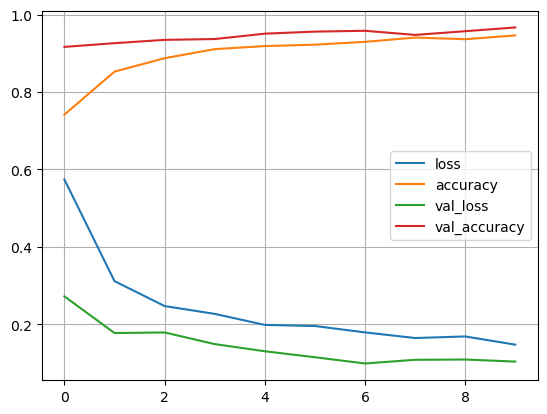

In [18]:
pd.DataFrame(model_history.history).plot()
plt.grid(True)

In [19]:
loss,accuracy=model.evaluate(x_eval, y1)
print('Loss : ',loss)
print('Accuracy : ',accuracy)

20/20 [==============================] - 5s 247ms/step - loss: 0.2392 - accuracy: 0.9119
Loss :  0.2391791045665741
Accuracy :  0.9118589758872986


In [20]:
model.save("C:/Users/neera/Downloads/Data/CNN_model.h5")

## Test Data

In [21]:
#Loading the train images from train dataset
x2=[]
y_test=[]
base_path="C:/Users/neera/Downloads/Data/test"
for child in os.listdir(base_path):
    print(child)
    sub_path=os.path.join(base_path,child)
    if os.path.isdir(sub_path):
        for xray in os.listdir(sub_path):
            im=Image.open(os.path.join(sub_path,xray))
            im=im.convert("RGB")
            im=np.array(im.resize((224,224)))
            im=im.reshape([224,224,3])#converting all images into same dimension
            im=np.array(im)
            x2.append(im)
            y_test.append(child)

NORMAL
PNEUMONIA


In [23]:
print('NO: of NORMAL X-rays in train dataset :',y_test.count("NORMAL"))
print('NO: of PNEUMONIA X-rays in train dataset :',y_test.count("PNEUMONIA"))

NO: of NORMAL X-rays in train dataset : 317
NO: of PNEUMONIA X-rays in train dataset : 855


In [24]:
#Converting the values into Float 
x_test=np.asarray(x2).astype('float32')
x_test=x_test/np.max(x_test)#Normalizing values to be between 0 and 1
print(x_test.shape)

(1172, 224, 224, 3)


## Testing the model

In [25]:
prediction=model.predict(x_test)

37/37 [==============================] - 9s 247ms/step


In [26]:
prediction=lb.inverse_transform(prediction)

In [28]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print(accuracy_score(y_test,prediction))
print(f1_score(y_test,prediction,pos_label='PNEUMONIA'))
print(confusion_matrix(y_test,prediction))

0.9428327645051194
0.9600477042337507
[[300  17]
 [ 50 805]]
